# Neural Network
### Mathematical Notation:

$$z = \mathbf{w}^T \mathbf{x} + b$$
$$a = f(z)$$


In [6]:
import os, requests, gzip
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist_address = [
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/t10k-images-idx3-ubyte.gz",
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/t10k-labels-idx1-ubyte.gz",
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/train-images-idx3-ubyte.gz",
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/train-labels-idx1-ubyte.gz"
]

In [3]:
os.makedirs('mnist_data', exist_ok=True)
mnist_folder = 'mnist_data'

os.makedirs("mnist_data", exist_ok=True)
mnist_folder = "mnist_data"

def download_mnist(address):
    for address in mnist_address:
        response = requests.get(address)
        file_name = address.split("/")[-1]
        path = os.path.join(mnist_folder, file_name)
        with open(path, "wb") as f:
            f.write(response.content)
download_mnist(mnist_address)

In [4]:
with gzip.open(os.path.join(mnist_folder, "train-labels-idx1-ubyte.gz"), "rb") as f:
    train_labels = np.frombuffer(f.read(), np.uint8, offset=8)
with gzip.open(os.path.join(mnist_folder, "train-images-idx3-ubyte.gz"), "rb") as f:
    train_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
with gzip.open(os.path.join(mnist_folder, "t10k-labels-idx1-ubyte.gz"), "rb") as f:
    test_labels = np.frombuffer(f.read(), np.uint8, offset=8)
with gzip.open(os.path.join(mnist_folder, "t10k-images-idx3-ubyte.gz"), "rb") as f:
    test_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

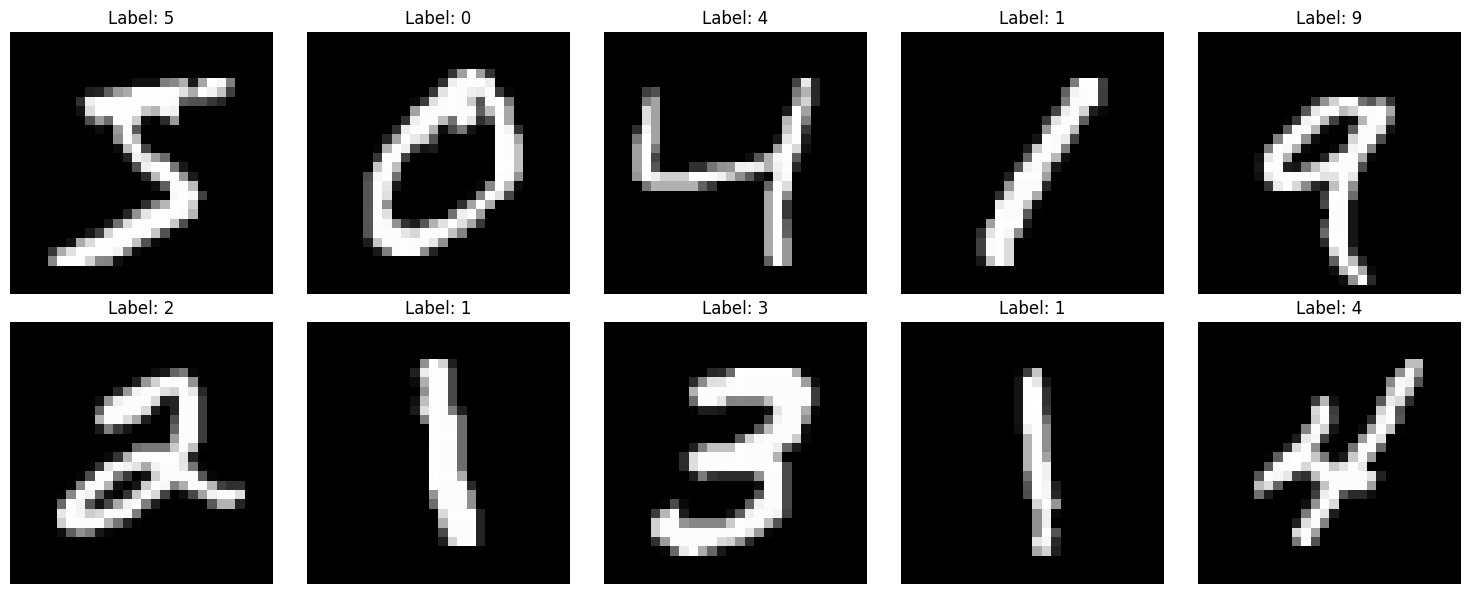

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax[i//5, i%5].imshow(train_images[i], cmap="gray")
    ax[i//5, i%5].set_title(f"Label: {train_labels[i]}")
    ax[i//5, i%5].axis("off")
plt.tight_layout()
plt.show()

In [8]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

print(train_images[1])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0 

In [9]:
scallar = np.array([1])

vector = np.array([1, 2, 3])

matrix = np.array([[1, 2, 3], [4, 5, 6]])

print(scallar.shape)
print(vector.shape)
print(matrix.shape)

(1,)
(3,)
(2, 3)


In [ ]:
input_size = 10
output_size = 4
W = np.random.randn(output_size, input_size) * np.sqrt(2 / input_size)
print(W)

(28, 28)
[0.10317855 0.25354989 0.04889047 0.04889047 0.04889047 0.04889047
 0.04889047 0.04889047 0.04889047 0.30103826]
9


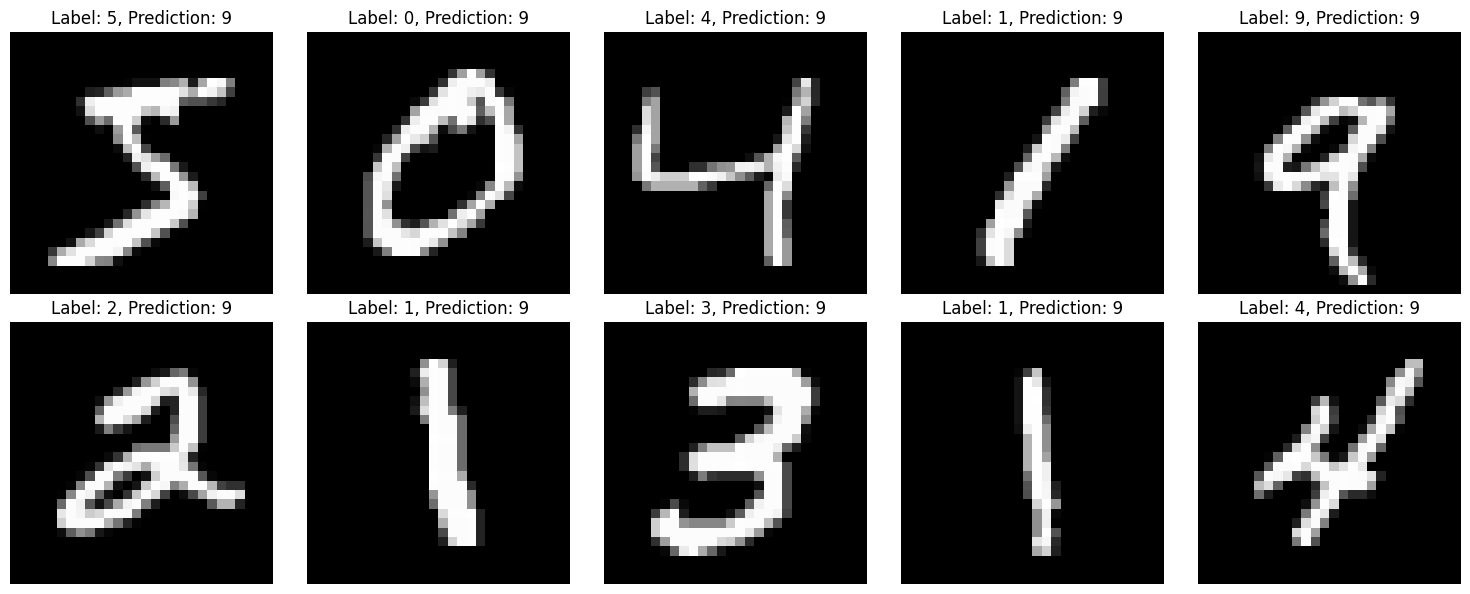

In [11]:
from torch._refs import exponential


class LinearLayer():
    def __init__(self, input_size, output_size):
        self.W = np.random.randn(output_size, input_size) * np.sqrt(2 / input_size)
        self.B = np.zeros(output_size)

        self.input_cache = None
        self.preactivation_cache = None

        self.grad_W = np.zeros_like(self.W)
        self.grad_B = np.zeros_like(self.B)

    def relu_activation(self, input):
        return np.maximum(0, input)
    def forward(self, input):
        output = np.dot(self.W, input) + self.B
        output = self.relu_activation(output)
        return output
    def backpropagation(self, grad_output):

class NumpyFullyConnectedNetwork():
    def __init__(self):
        self.layers = []
        self.layers.append(LinearLayer(28 * 28, 196, True))
        self.layers.append(LinearLayer(196, 32, True))
        self.layers.append(LinearLayer(32, 10, False))
    def softmax(self, input):
        exponential = input - np.max(input)
        exponential = np.exp(exponential)
        return exponential / np.sum(exponential)
    def forward(self, input):
        for layer in self.layers:
            input = layer.forward(input)
        return self.softmax(input)


print (train_images[0].shape)
train_images_flat = train_images.reshape(-1, 28*28)
# print (train_images_flat[0])
train_images_flat_scale = (train_images_flat / 255.0) - 0.5
# print (train_images_flat_scale[0].shape)



numpy_net = NumpyFullyConnectedNetwork()
output = numpy_net.forward(train_images_flat_scale[0])
print (output)
print (np.argmax(output))



fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    output = numpy_net.forward(train_images_flat_scale[i])
    prediction = np.argmax(output)
    ax[i//5, i%5].imshow(train_images[i], cmap="gray")
    ax[i//5, i%5].set_title(f"Label: {train_labels[i]}, Prediction: {prediction}")
    ax[i//5, i%5].axis("off")
plt.tight_layout()
plt.show()

## ReLU Activation Function

ReLU stands for Rectified Linear Unit. It's a simple yet effective activation function used in neural networks. The mathematical formula for ReLU is:

$$f(z) = \max(0, z)$$

This means that if the input $z$ is positive, the output is $z$. If the input is negative, the output is 0.

**Why is ReLU used?**

* **Computational Efficiency:** It's very fast to compute compared to other activation functions like sigmoid or tanh, as it only involves a simple comparison and assignment.
* **Mitigates Vanishing Gradients:** In deeper networks, gradients can become very small during backpropagation, making training difficult. ReLU helps alleviate this problem for positive inputs.

**Where it's used in the code:**

In the `LinearLayer` class, the `relu_activation` method applies the ReLU function to the output of the linear transformation (`np.dot(self.W, input) + self.B`). This introduces non-linearity into the network, which is essential for learning complex patterns.

# Fully connected network

https://adamharley.com/nn_vis/mlp/3d.html

# Membuat Neural Network menggunakan pytorch

In [ ]:
## Batch training

# Convolutional Neural Network

https://adamharley.com/nn_vis/cnn/3d.html